In [146]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import DEFAULT_PLOTLY_COLORS as colors
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [158]:
def plot_residual_ci(residuals):
    mu, sigma = norm.fit(residuals)
    x = np.linspace(-1, 1, 100)
    fig = go.Figure()
    fig.add_histogram(x=residuals, histnorm='probability density', nbinsx=20, name='Residuals')
    fig.add_trace(go.Scatter(x=x, y=norm.pdf(x, mu, sigma), mode='lines', name='fit'))
    fig.add_trace(go.Scatter(x=[mu - 2 * sigma, mu - 2 * sigma],
                  y=[0, 1], name='95% CI', mode='lines', line=dict(color=colors[2])))
    fig.add_trace(go.Scatter(x=[mu + 2 * sigma, mu + 2 * sigma],
                  y=[0, 1], showlegend=False, mode='lines', line=dict(color=colors[2])))
    fig.add_trace(go.Scatter(x=[mu - 1.25 * sigma, mu - 1.25 * sigma],
                  y=[0, 1], name='80% CI', mode='lines', line=dict(color=colors[3])))
    fig.add_trace(go.Scatter(x=[mu + 1.25 * sigma, mu + 1.25 * sigma],
                  y=[0, 1], showlegend=False, mode='lines', line=dict(color=colors[3])))
    fig.update_layout(height=500, width=750)
    fig.show()
    print(f"95% CI: +/- {2 * sigma:0.2f} log(GE)/ml")
    print(f"80% CI: +/- {1.25 * sigma:0.2f} log(GE)/ml")
    

def get_trendline(df):
    lin_fit_x = df.loc[~(df['Plate count log(cfu)/ml'].isna()),
                          'Plate count log(cfu)/ml']
    lin_fit_y = df.loc[~(df['Plate count log(cfu)/ml'].isna()),
                          'log(Genomic Equivalents)/ml']
    slope, intercept, rval, pval, stderr = linregress(lin_fit_x, lin_fit_y)
    trendline_x=np.linspace(lin_fit_x.min(), lin_fit_x.max())
    trendline_y=slope * np.linspace(lin_fit_x.min(), lin_fit_x.max()) + intercept
    return trendline_x, trendline_y, rval, slope, intercept

In [207]:
counts = pd.read_csv('quantifications.csv')
with open('../../model_training/output_idbd_7logs/model_coefficients_5logs_no_paer.txt') as reg_coeff:
    slope = reg_coeff.readline().split('\t')[1]
    intercept = reg_coeff.readline().split('\t')[1]
reg_data = pd.read_csv('../../model_training/output_idbd_7logs/plot_data.csv', index_col=0)
reg_data_synergy = pd.read_csv('../../model_training/output_synergy/plot_data.csv', index_col=0)
lod_data = pd.read_csv('lod_observed_detections.csv')
lod_dict = lod_data.to_dict(orient='list')

## Possible bins

### GE/ml Distribution

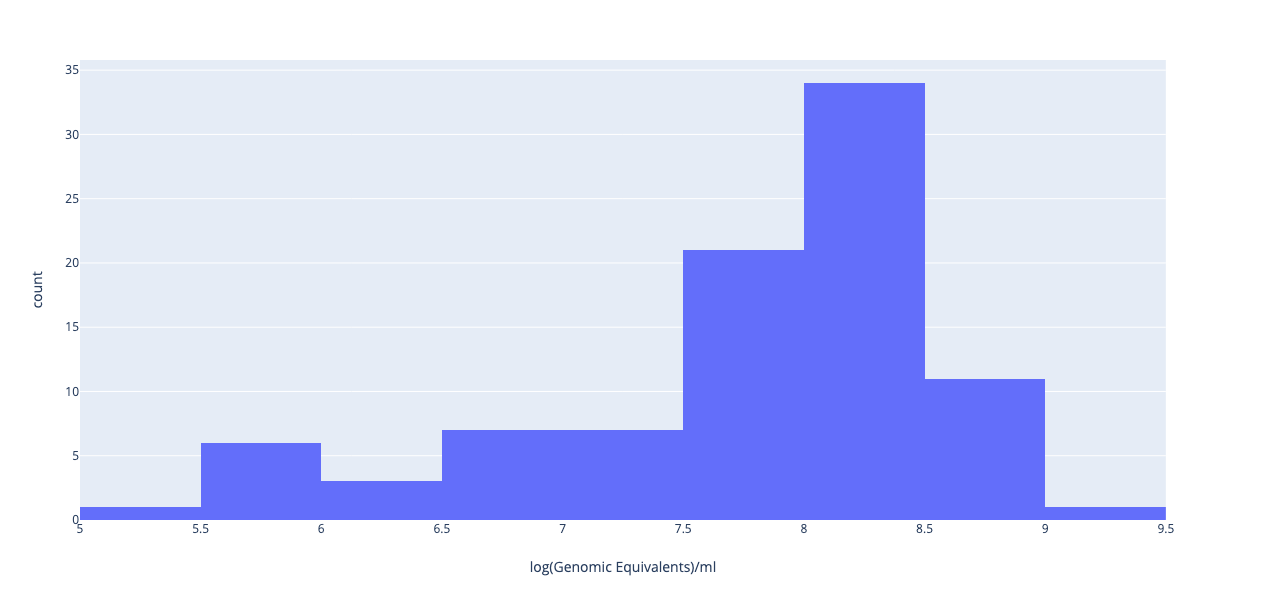

In [14]:
fig_ge_hist = px.histogram(counts, x='log(Genomic Equivalents)/ml')
fig_ge_hist

### Tercile Bins

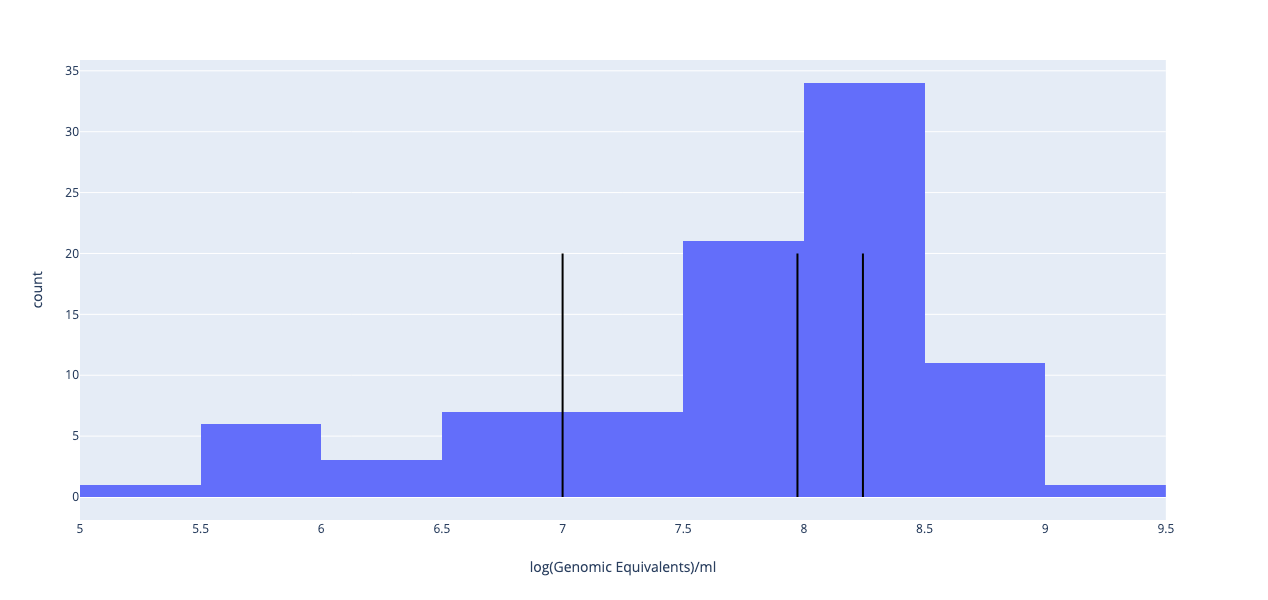

In [15]:
counts_above_7 = counts[(counts['log(Genomic Equivalents)/ml'] > 7) &
                        (~counts['log(Genomic Equivalents)/ml'].isna())]
lower_tercile = np.quantile(counts_above_7['log(Genomic Equivalents)/ml'], 0.33)
upper_tercile = np.quantile(counts_above_7['log(Genomic Equivalents)/ml'], 0.66)
fig_tercile = go.Figure(fig_ge_hist)
fig_tercile.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_tercile.add_trace(go.Scatter(x=[lower_tercile, lower_tercile],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_tercile.add_trace(go.Scatter(x=[upper_tercile, upper_tercile],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_tercile.show()

### Equal bins

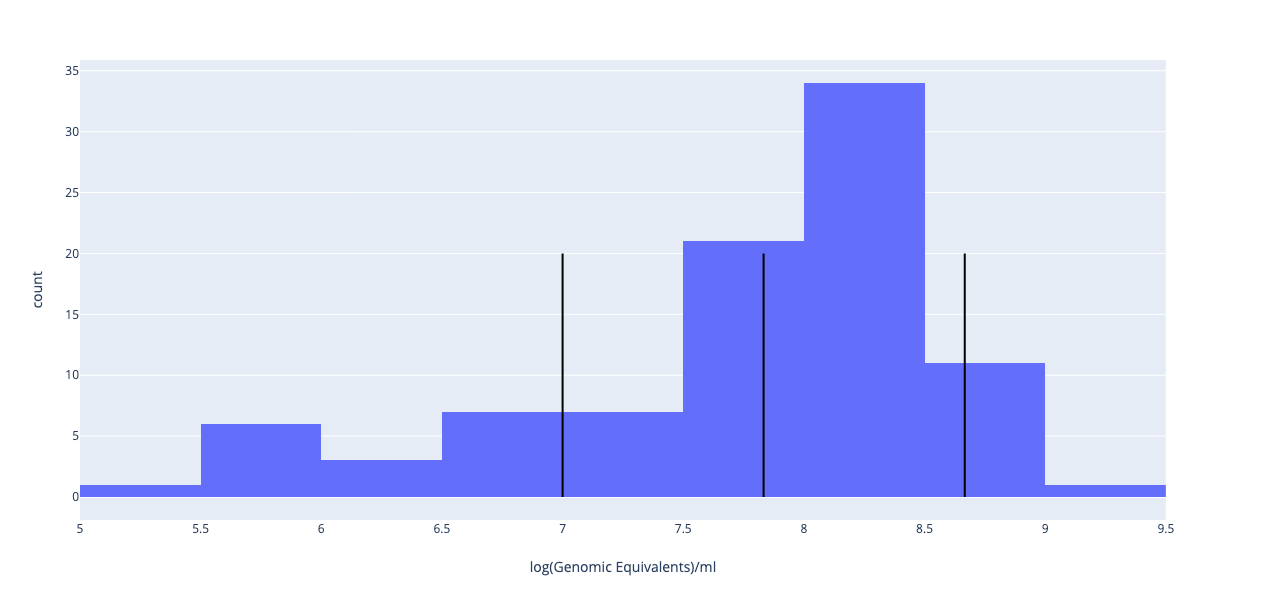

In [19]:
fig_thirds = go.Figure(fig_ge_hist)
fig_thirds.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_thirds.add_trace(go.Scatter(x=[7.833, 7.833],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_thirds.add_trace(go.Scatter(x=[8.66666, 8.6666],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_thirds.show()

### Two bins above 10<sup>7</sup>

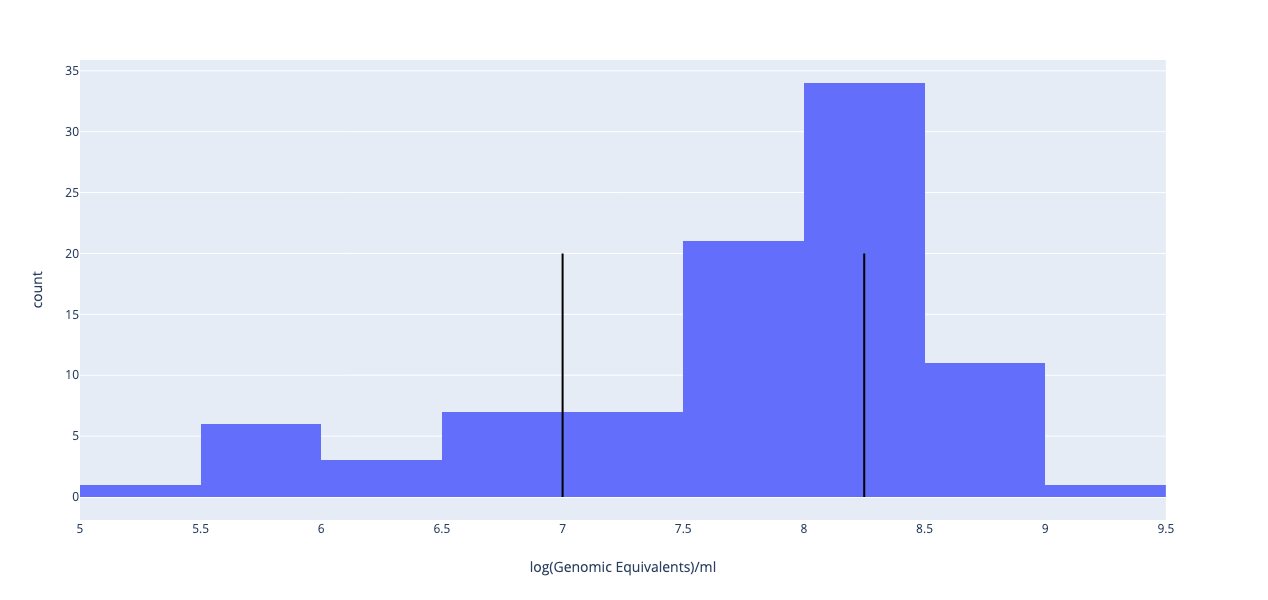

In [23]:
fig_two = go.Figure(fig_ge_hist)
fig_two.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_two.add_trace(go.Scatter(x=[8.25, 8.25],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_two.show()

## Residuals

### IDBD standard curve

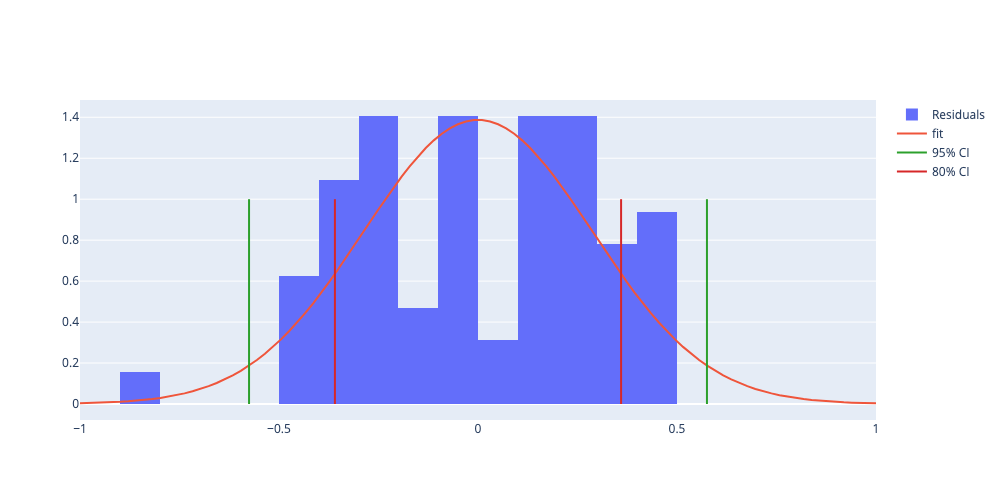

95% CI: +/- 0.58 log(GE)/ml
80% CI: +/- 0.36 log(GE)/ml


In [100]:
plot_residual_ci(reg_data['residuals'])

### Synergy standard curve

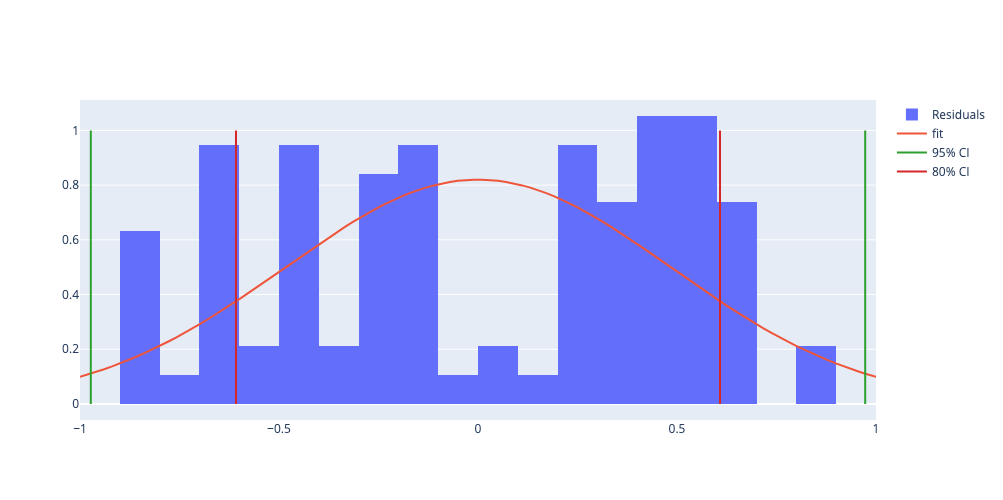

95% CI: +/- 0.97 log(GE)/ml
80% CI: +/- 0.61 log(GE)/ml


In [99]:
plot_residual_ci(reg_data_synergy['residuals'])

## Binning confidence

### Three bins above 10<sup>7</sup>, Synergy error

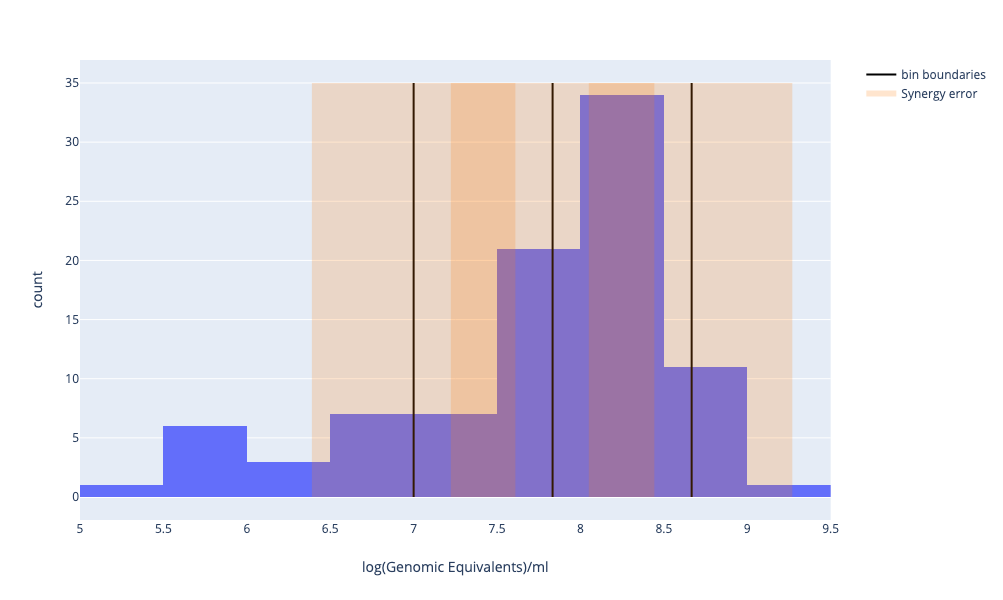

In [135]:
fig_error = go.Figure(fig_ge_hist)
fig_error.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 35], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7.833, 7.833],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[8.66666, 8.6666],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7-0.61, 7+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_error.add_trace(go.Scatter(x=[7.833-0.61, 7.833+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_error.add_trace(go.Scatter(x=[8.66-0.61, 8.66+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))

### Three bins above 10<sup>7</sup>, IDBD error

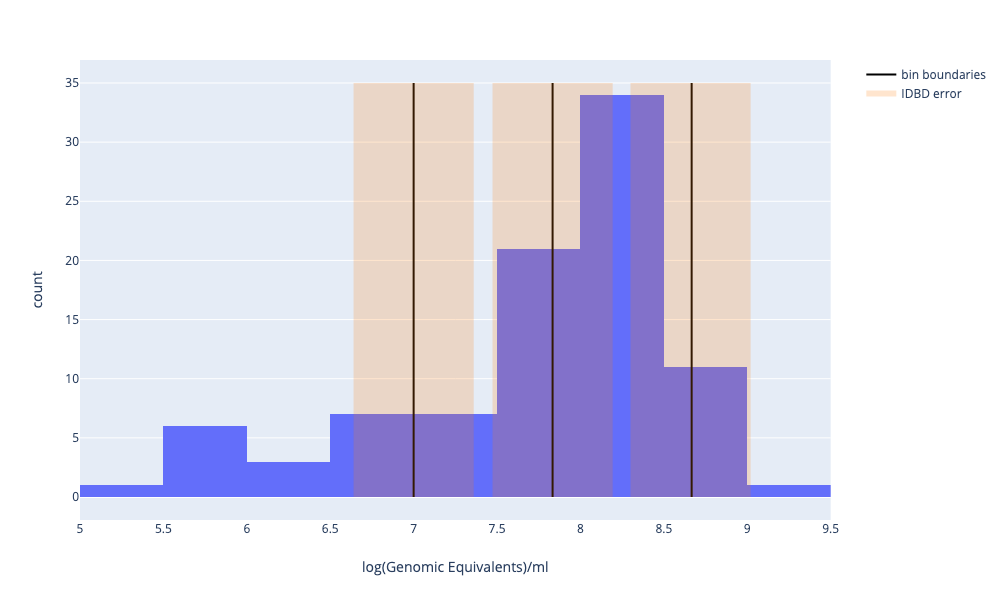

In [137]:
fig_error = go.Figure(fig_ge_hist)
fig_error.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 35], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7.833, 7.833],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[8.66666, 8.6666],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7-0.36, 7+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               name='IDBD error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_error.add_trace(go.Scatter(x=[7.833-0.36, 7.833+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_error.add_trace(go.Scatter(x=[8.66-0.36, 8.66+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))

### Two bins above 10<sup>7</sup>, Synergy error

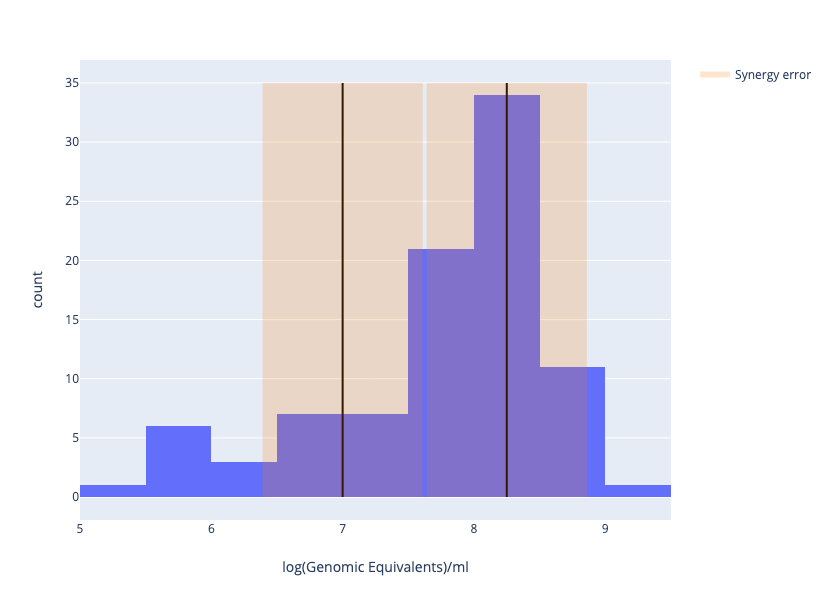

In [141]:
fig_error = go.Figure(fig_ge_hist)
fig_error.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[8.25, 8.25],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7-0.61, 7+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_error.add_trace(go.Scatter(x=[8.25-0.61, 8.25+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_error.show()

### Two bins above 10<sup>7</sup>, IDBD error

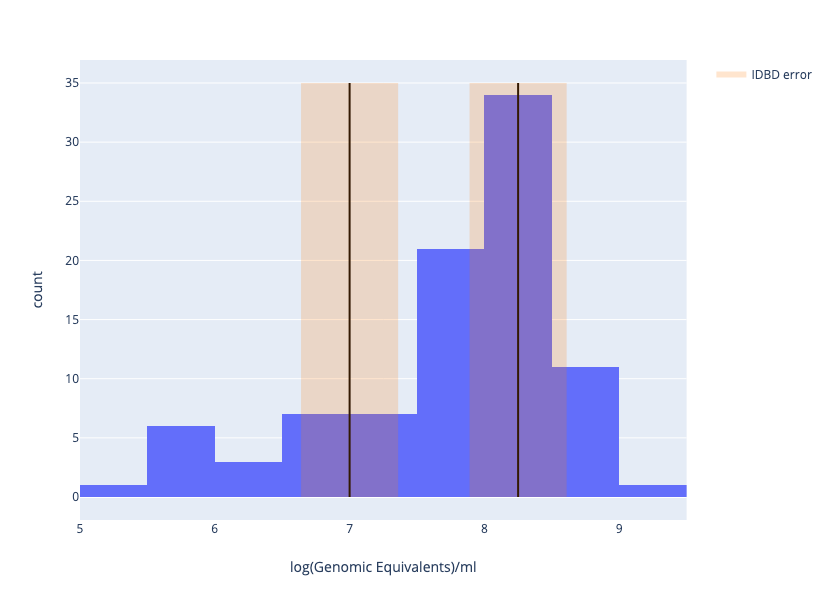

In [142]:
fig_error = go.Figure(fig_ge_hist)
fig_error.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[8.25, 8.25],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7-0.36, 7+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               name='IDBD error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_error.add_trace(go.Scatter(x=[8.25-0.36, 8.25+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_error.show()

## Correlation plots 

### Synergy

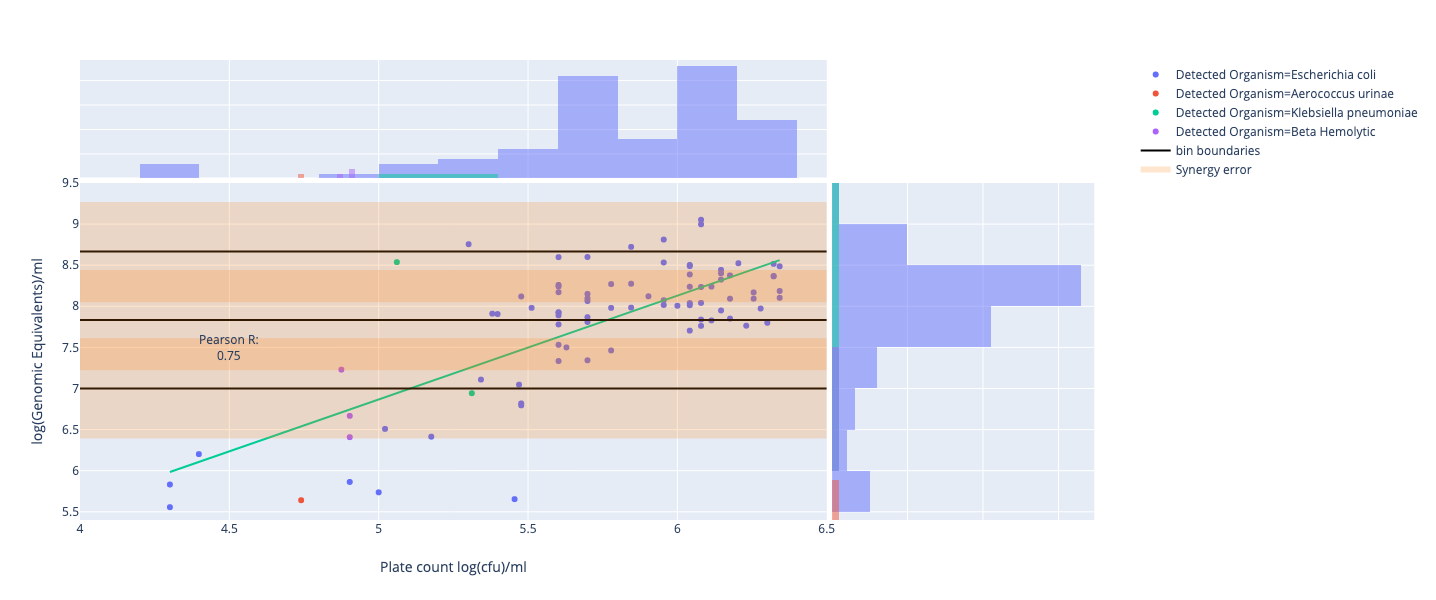

In [155]:
ge_df = counts[~counts['log(Genomic Equivalents)/ml'].isna()]
trendline_x, trendline_y, rval = get_trendline(ge_df)
fig_cor = px.scatter(ge_df[~(ge_df['Plate count log(cfu)/ml'].isna())],
                     x='Plate count log(cfu)/ml',
                     y='log(Genomic Equivalents)/ml',
                     marginal_x='histogram', marginal_y='histogram',
                     color='Detected Organism',
                     hover_data=['Accession',
                                 'Detected Organism',
                                 'Plate count log(cfu)/ml',
                                 'log(Genomic Equivalents)/ml'])
fig_cor.add_scatter(x=trendline_x, y=trendline_y,
                    mode='lines', showlegend=False)
fig_cor.update_layout(
    annotations=[
        dict(x=4.5, y=7.5, text=f"Pearson R:<br>{rval:0.2f}", showarrow=False)
    ]
)
fig_cor.add_trace(go.Scatter(y=[7, 7],
                                 x=[4, 6.5], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[7.833, 7.833],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[8.66666, 8.6666],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[7-0.61, 7+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_cor.add_trace(go.Scatter(y=[7.833-0.61, 7.833+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_cor.add_trace(go.Scatter(y=[8.66-0.61, 8.66+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_cor.update_layout(xaxis=dict(range=[4, 6.5]), yaxis=dict(range=[5.4, 9.5]))
fig_cor.show()

Correlation fit
slope: 1.2623530018896445
intercept: 0.554962394032656


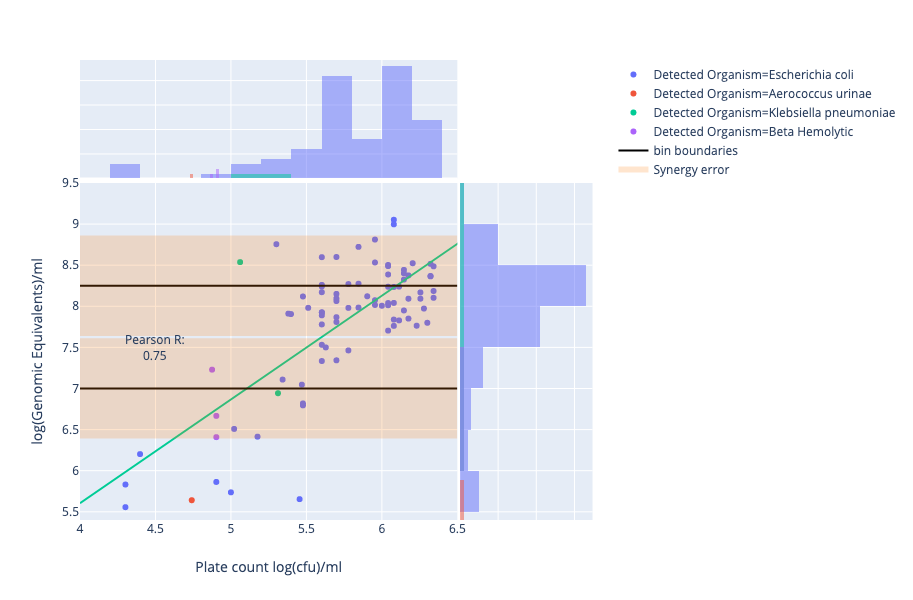

In [162]:
ge_df = counts[~counts['log(Genomic Equivalents)/ml'].isna()]
trendline_x, trendline_y, rval, slope, intercept = get_trendline(ge_df)
print(f"Correlation fit\nslope: {slope}\nintercept: {intercept}")
fig_cor = px.scatter(ge_df[~(ge_df['Plate count log(cfu)/ml'].isna())],
                     x='Plate count log(cfu)/ml',
                     y='log(Genomic Equivalents)/ml',
                     marginal_x='histogram', marginal_y='histogram',
                     color='Detected Organism',
                     hover_data=['Accession',
                                 'Detected Organism',
                                 'Plate count log(cfu)/ml',
                                 'log(Genomic Equivalents)/ml'])
fig_cor.add_scatter(x=np.linspace(4, 7), y=slope * np.linspace(4, 7) + intercept,
                    mode='lines', showlegend=False)
fig_cor.update_layout(
    annotations=[
        dict(x=4.5, y=7.5, text=f"Pearson R:<br>{rval:0.2f}", showarrow=False)
    ]
)
fig_cor.add_trace(go.Scatter(y=[7, 7],
                                 x=[4, 6.5], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[8.25, 8.25],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[7-0.61, 7+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_cor.add_trace(go.Scatter(y=[8.25-0.61, 8.25+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_cor.update_layout(xaxis=dict(range=[4, 6.5]), yaxis=dict(range=[5.4, 9.5]))
fig_cor.show()

Bins corresponding to 10<sup>5</sup> and 10<sup>6</sup> CFU/ml were suggested in the meeting 2019-09-19.

In [167]:
np.log10(2.738e5)

5.437433443797971

Kitchen sink plot

Correlation fit
slope: 1.2623530018896445
intercept: 0.554962394032656
GE/ml threshold for 10^6 GE/ml: 8.129080405370523
GE/ml threshold for 10^5 GE/ml: 6.866727403480879


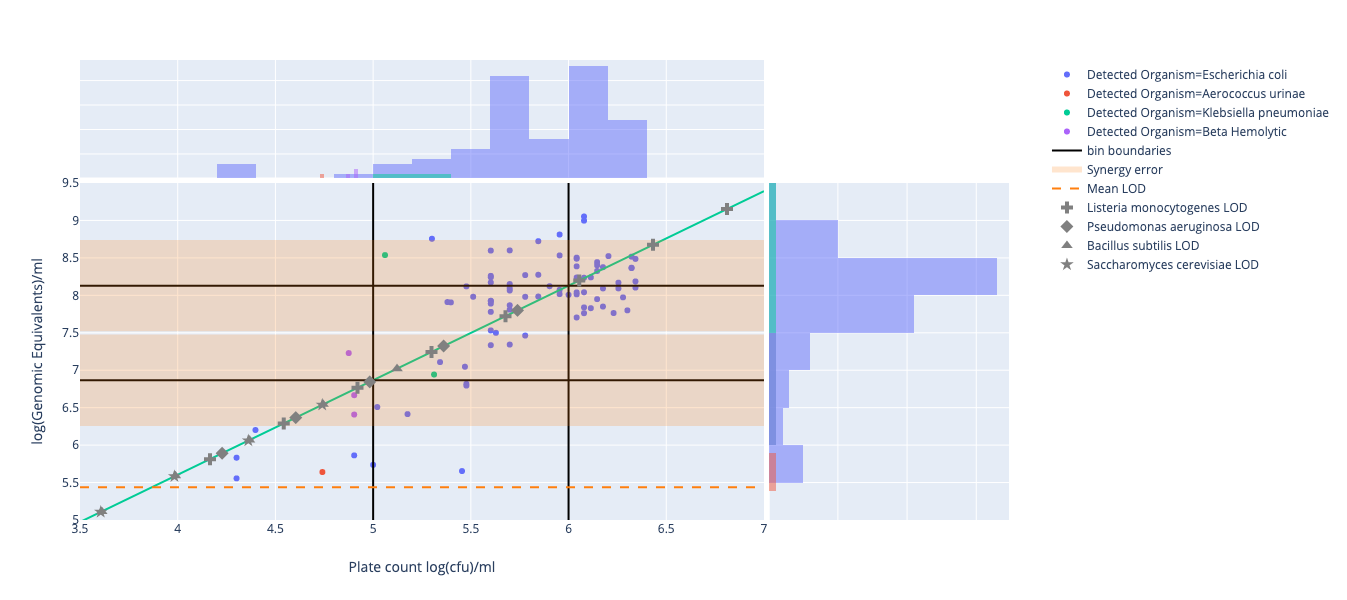

In [234]:
ge_df = counts[~counts['log(Genomic Equivalents)/ml'].isna()]
xlims = [3.5, 7]
ylims = [5, 9.5]
trendline_x, trendline_y, rval, slope, intercept = get_trendline(ge_df)
print(f"Correlation fit\nslope: {slope}\nintercept: {intercept}")
fig_cor = px.scatter(ge_df[~(ge_df['Plate count log(cfu)/ml'].isna())],
                     x='Plate count log(cfu)/ml',
                     y='log(Genomic Equivalents)/ml',
                     marginal_x='histogram', marginal_y='histogram',
                     color='Detected Organism',
                     hover_data=['Accession',
                                 'Detected Organism',
                                 'Plate count log(cfu)/ml',
                                 'log(Genomic Equivalents)/ml'])
fig_cor.add_scatter(x=np.linspace(xlims[0], xlims[1]), y=slope * np.linspace(xlims[0], xlims[1]) + intercept,
                    mode='lines', showlegend=False)
# 10^5 and 10^6 cfu/ml bin lines
fig_cor.add_trace(go.Scatter(y=ylims, x=[5, 5], mode='lines',
                             legendgroup='bin',
                             showlegend=False, line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=ylims, x=[6, 6], mode='lines',
                             legendgroup='bin',
                             showlegend=False, line=dict(color='rgb(0,0,0)')))
# Corresponding GE/ml bin lines
upper_ge_bin_line = slope * 6 + intercept
lower_ge_bin_line = slope * 5 + intercept
print(f"GE/ml threshold for 10^6 GE/ml: {upper_ge_bin_line}")
print(f"GE/ml threshold for 10^5 GE/ml: {lower_ge_bin_line}")
fig_cor.add_trace(go.Scatter(y=[lower_ge_bin_line, lower_ge_bin_line],
                                 x=xlims, mode='lines', name='bin boundaries',
                                 legendgroup='bin',
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[upper_ge_bin_line, upper_ge_bin_line],
                                 x=xlims, mode='lines', showlegend=False,
                                legendgroup='bin',
                                 line=dict(color='rgb(0,0,0)')))
# Model error areas
fig_cor.add_trace(go.Scatter(y=[lower_ge_bin_line-0.61, lower_ge_bin_line+0.61],
                             x=[xlims[1], xlims[1]], fill='tozerox', mode='none',
                             legendgroup='error',
                             name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_cor.add_trace(go.Scatter(y=[upper_ge_bin_line-0.61, upper_ge_bin_line+0.61],
                             x=[xlims[1], xlims[1]], fill='tozerox', mode='none',
                             legendgroup='error',
                             fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
# With average LOD from Zymo titration II titration study
avg_lod = 5.437433443797971
fig_cor.add_trace(go.Scatter(y=[avg_lod, avg_lod],
                                 x=xlims, mode='lines', name='Mean LOD',
                                 line=dict(color=colors[1], dash='dash')))
# Add lod raw data
symbols = ['cross', 'diamond', 'triangle-up', 'star']
for key, symbol in zip(lod_dict, symbols):
    yvals = np.array(lod_dict[key])
    yvals = np.log10(yvals[~np.isnan(yvals)])
    xvals = (yvals - intercept) / slope
    fig_cor.add_trace(go.Scatter(y=yvals, x=xvals, mode='markers',
                                 name=key + ' LOD',
                                 marker=dict(symbol=symbol, color='rgb(0.5, 0.5, 0.5)', size=10)))
fig_cor.update_layout(xaxis=dict(range=xlims), yaxis=dict(range=ylims))
fig_cor.show()
fig_cor.write_html('GE-CFU_correlation_with_LOD.html')

Less busy version

Correlation fit
slope: 1.2623530018896445
intercept: 0.554962394032656
GE/ml threshold for 10^6 GE/ml: 8.129080405370523
GE/ml threshold for 10^5 GE/ml: 6.866727403480879


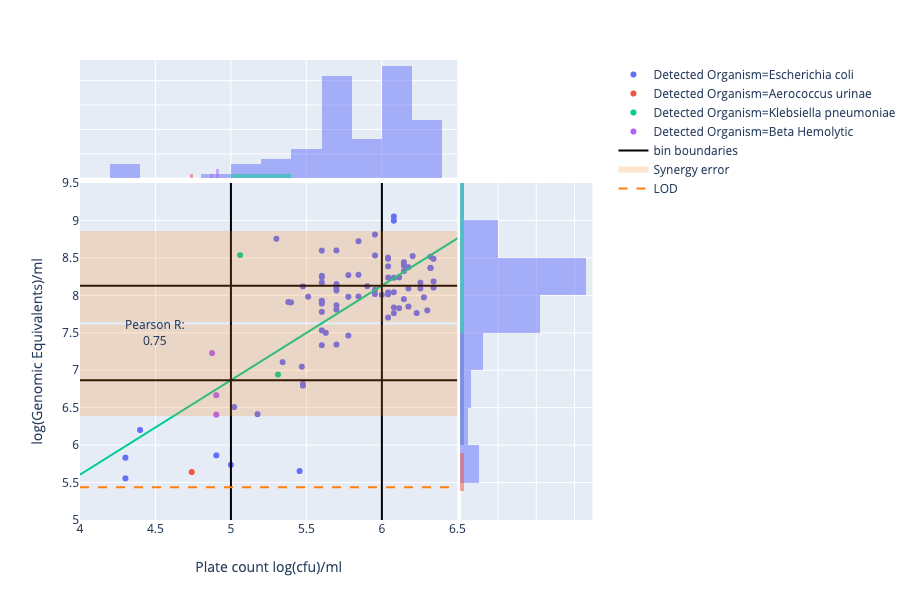

In [219]:
ge_df = counts[~counts['log(Genomic Equivalents)/ml'].isna()]
trendline_x, trendline_y, rval, slope, intercept = get_trendline(ge_df)
print(f"Correlation fit\nslope: {slope}\nintercept: {intercept}")
fig_cor = px.scatter(ge_df[~(ge_df['Plate count log(cfu)/ml'].isna())],
                     x='Plate count log(cfu)/ml',
                     y='log(Genomic Equivalents)/ml',
                     marginal_x='histogram', marginal_y='histogram',
                     color='Detected Organism',
                     hover_data=['Accession',
                                 'Detected Organism',
                                 'Plate count log(cfu)/ml',
                                 'log(Genomic Equivalents)/ml'])
fig_cor.add_scatter(x=np.linspace(4, 7), y=slope * np.linspace(4, 7) + intercept,
                    mode='lines', showlegend=False)
fig_cor.update_layout(
    annotations=[
        dict(x=4.5, y=7.5, text=f"Pearson R:<br>{rval:0.2f}", showarrow=False)
    ]
)
# 10^5 and 10^6 cfu/ml bin lines
fig_cor.add_trace(go.Scatter(y=[5, 9.5], x=[5, 5], mode='lines',
                             showlegend=False, line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[5, 9.5], x=[6, 6], mode='lines',
                             showlegend=False, line=dict(color='rgb(0,0,0)')))
# Corresponding GE/ml bin lines
upper_ge_bin_line = slope * 6 + intercept
lower_ge_bin_line = slope * 5 + intercept
print(f"GE/ml threshold for 10^6 GE/ml: {upper_ge_bin_line}")
print(f"GE/ml threshold for 10^5 GE/ml: {lower_ge_bin_line}")
fig_cor.add_trace(go.Scatter(y=[lower_ge_bin_line, lower_ge_bin_line],
                                 x=[4, 6.5], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[upper_ge_bin_line, upper_ge_bin_line],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
# Model error areas
fig_cor.add_trace(go.Scatter(y=[7-0.61, 7+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_cor.add_trace(go.Scatter(y=[8.25-0.61, 8.25+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
# With average LOD from Zymo titration II titration study
avg_lod = 5.437433443797971
fig_cor.add_trace(go.Scatter(y=[avg_lod, avg_lod],
                                 x=[4, 6.5], mode='lines', name='LOD',
                                 line=dict(color=colors[1], dash='dash')))
fig_cor.update_layout(xaxis=dict(range=[4, 6.5]), yaxis=dict(range=[5, 9.5]))
fig_cor.show()

In [206]:
lod_dict.keys()

dict_keys(['Listeria Monocytogenes', 'Pseudomonas aeruginosa', 'Bacillus subtilis', 'Saccharomyces cerevisiae'])

### Distribution of samples in bin boundaries

/Users/jmontgomery/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/jmontgomery/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



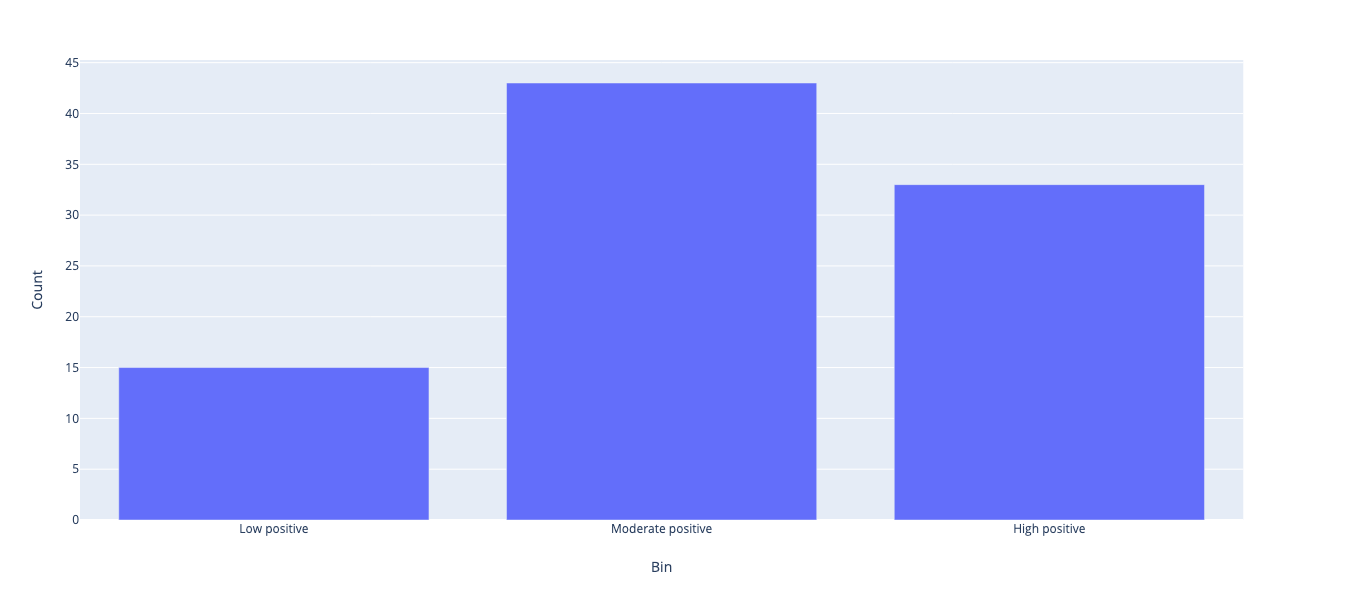

,index,Nominative Bin
0,Moderate positive,43
1,High positive,33
2,Low positive,15


In [228]:
bins=np.array([0, lower_ge_bin_line, upper_ge_bin_line, 10])
ge_df['Quantitative Bin'] = ge_df['log(Genomic Equivalents)/ml'].apply(lambda x: np.digitize(x, bins))
ge_df['Nominative Bin'] = ge_df['Quantitative Bin'].replace({1: 'Low positive',
                                                             2: 'Moderate positive',
                                                             3: 'High positive'})
fig_bins = px.bar(ge_df['Nominative Bin'].value_counts().to_frame().reset_index(), y='Nominative Bin',
                  x='index', labels={'index': 'Bin', 'Nominative Bin': 'Count'},
                  category_orders={'index': ['Low positive', 'Moderate positive', 'High positive']})
# go.Bar(x=)
fig_bins.show()
ge_df['Nominative Bin'].value_counts().to_frame().reset_index()

In [229]:
43+33+15

91

In [230]:
43 / 91

0.4725274725274725

In [231]:
33 / 91

0.3626373626373626

In [232]:
15 / 91

0.16483516483516483

In [233]:
16+36+47


99

### IDBD

Correlation fit
slope: 1.2623530018896445
intercept: 0.554962394032656


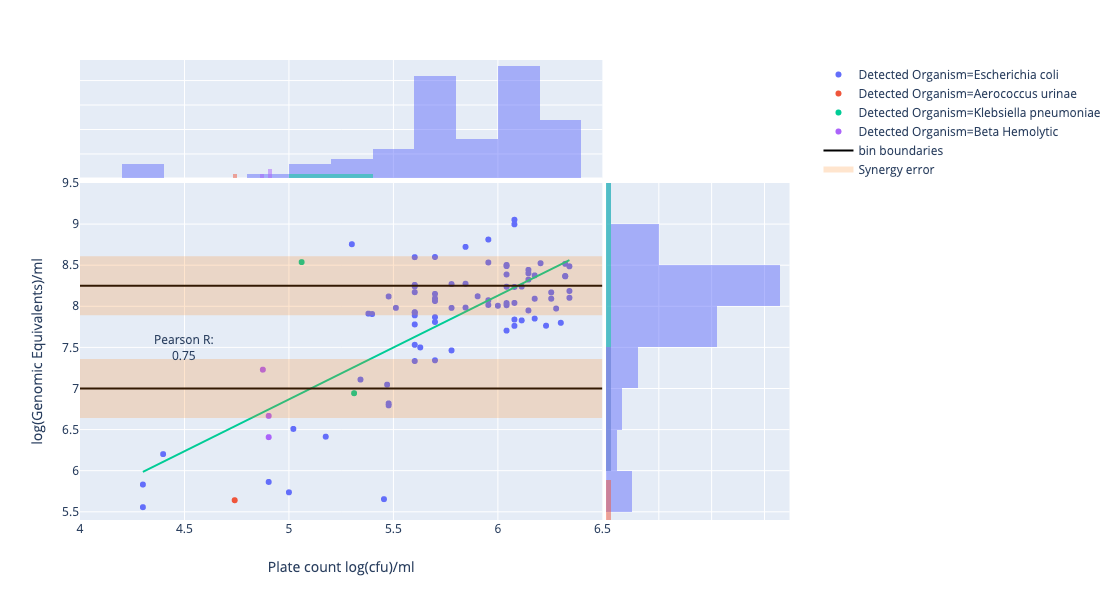

In [160]:
ge_df = counts[~counts['log(Genomic Equivalents)/ml'].isna()]
trendline_x, trendline_y, rval, slope, intercept = get_trendline(ge_df)
print(f"Correlation fit\nslope: {slope}\nintercept: {intercept}")
fig_cor = px.scatter(ge_df[~(ge_df['Plate count log(cfu)/ml'].isna())],
                     x='Plate count log(cfu)/ml',
                     y='log(Genomic Equivalents)/ml',
                     marginal_x='histogram', marginal_y='histogram',
                     color='Detected Organism',
                     hover_data=['Accession',
                                 'Detected Organism',
                                 'Plate count log(cfu)/ml',
                                 'log(Genomic Equivalents)/ml'])
fig_cor.add_scatter(x=trendline_x, y=trendline_y,
                    mode='lines', showlegend=False)
fig_cor.update_layout(
    annotations=[
        dict(x=4.5, y=7.5, text=f"Pearson R:<br>{rval:0.2f}", showarrow=False)
    ]
)
fig_cor.add_trace(go.Scatter(y=[7, 7],
                                 x=[4, 6.5], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[8.25, 8.25],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[7-0.36, 7+0.36], x=[6.5, 6.5], fill='tozerox', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_cor.add_trace(go.Scatter(y=[8.25-0.36, 8.25+0.36], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_cor.update_layout(xaxis=dict(range=[4, 6.5]), yaxis=dict(range=[5.4, 9.5]))
fig_cor.show()